# Importing the dependencies

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)

# Loading the data
df = pd.read_csv('Cleaned_datasets/Combined_CleanData_V2.csv')

For the detection and dealing with outliers there are few recommended steps which we need to perform and these are 
- First we must plot a histogram to visualize the shape of distribution of a continuous numerical feature
- If the distribution is not linear and have skewneess in it then it is always recommended to use IQR method for the detection of outliers.


### Outlier detection : `price`

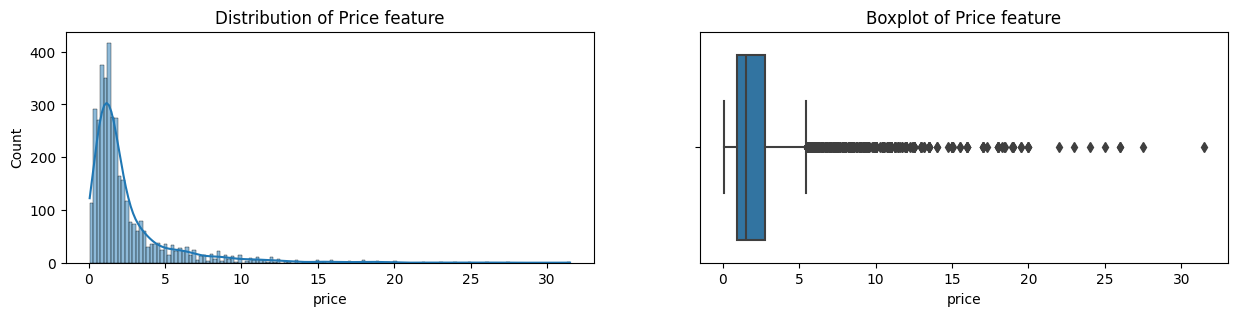

In [2]:
fig,ax = plt.subplots(1,2,figsize=(15,3))

sns.histplot(x=df['price'],kde=True,ax = ax[0])
ax[0].set_title("Distribution of Price feature")

sns.boxplot(x = df['price'],ax = ax[1])
ax[1].set_title("Boxplot of Price feature")
plt.show()

In [3]:
q1 = df['price'].quantile(0.25)
q3 = df['price'].quantile(0.75)

# Calculating the IQR
IQR = q3-q1

# Finding the upper and lower limit (Defining boundaries for outliers)
lower_bound = q1 - 1.5 * IQR
upper_bound = q3 + 1.5 * IQR

Outliers_df = df[(df['price']<lower_bound) | (df['price']>upper_bound)]
Outliers_df.shape

(426, 26)

In [4]:
Complete_data = df['price'].describe()
Price_outliers_data = Outliers_df['price'].describe()
Comparision_df = pd.concat([Complete_data,Price_outliers_data],axis=1)
Comparision_df

,price,price
count,3796.000000,426.000000
mean,2.505313,9.209225
std,2.934686,4.059890
min,0.070000,5.490000
25%,0.940000,6.440000
50%,1.505000,8.000000
75%,2.750000,10.557500
max,31.500000,31.500000


In [5]:
# Removing data points having more than 20 crore price
df = df[df['price']<20.0]

### Outliers detection and removal: `Price_Per_SQFT` 

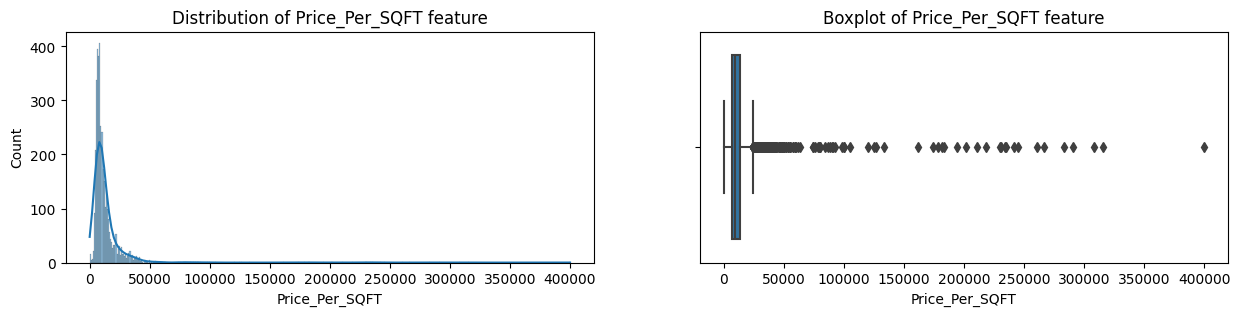

In [6]:
fig,ax = plt.subplots(1,2,figsize=(15,3))

sns.histplot(x=df['Price_Per_SQFT'],kde=True,ax = ax[0])
ax[0].set_title("Distribution of Price_Per_SQFT feature")

sns.boxplot(x = df['Price_Per_SQFT'],ax = ax[1])
ax[1].set_title("Boxplot of Price_Per_SQFT feature")
plt.show()

In [7]:
q1 = df['Price_Per_SQFT'].quantile(0.25)
q3 = df['Price_Per_SQFT'].quantile(0.75)

# Calculating the IQR
IQR = q3-q1

# Finding the upper and lower limit (Defining boundaries for outliers)
lower_bound = q1 - 1.5 * IQR
upper_bound = q3 + 1.5 * IQR

Outliers_pps = df[(df['Price_Per_SQFT']<lower_bound) | (df['Price_Per_SQFT']>upper_bound)]
Outliers_pps.shape

(351, 26)

In [8]:
Outliers_pps['Price_Per_SQFT'].describe()

count       351.000000
mean      50238.444444
std       53429.481212
min       24280.000000
25%       27824.500000
50%       33333.000000
75%       41465.000000
max      400000.000000
Name: Price_Per_SQFT, dtype: float64

Once we will carefully observe all the outlier data points we will see that there are certain properties which are having Area less than 1000 and these are actually in term of square yards. So we will simply need to multiply them by 9 and then use them to recalculate the Price_Per_SQFT.

In [9]:
Outliers_pps.loc[:,'Area'] = Outliers_pps['Area'].apply(lambda x:x*9 if x<1000 else x)
Outliers_pps.loc[:,'Price_Per_SQFT'] = round((Outliers_pps['price']*10000000)/Outliers_pps['Area'])

# Updating the values
df.update(Outliers_pps)

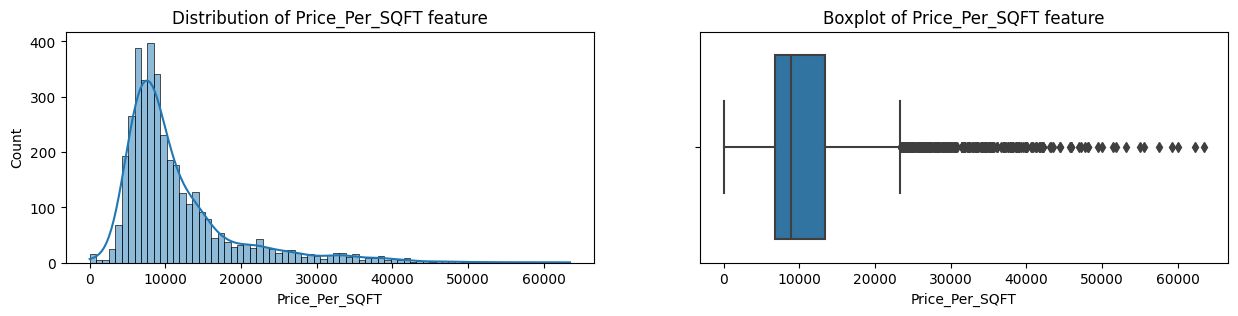

In [10]:
fig,ax = plt.subplots(1,2,figsize=(15,3))

sns.histplot(x=df['Price_Per_SQFT'],kde=True,ax = ax[0])
ax[0].set_title("Distribution of Price_Per_SQFT feature")

sns.boxplot(x = df['Price_Per_SQFT'],ax = ax[1])
ax[1].set_title("Boxplot of Price_Per_SQFT feature")
plt.show()

In [11]:
# Only considering data points having less than 50000 Price_Per_SQFT
df = df[df['Price_Per_SQFT']<=50000]

### Outliers detection and removal: `bedRoom` 

In [12]:
# Only considring data points having 15 or less than 15 bedrooms
df = df[df['bedRoom'] <= 10.0]

### Outliers detection and removal: `luxury_score` 

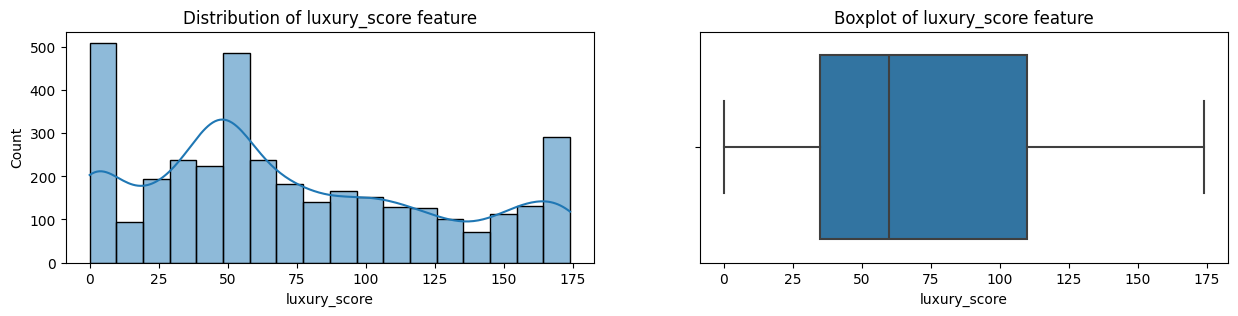

In [13]:
fig,ax = plt.subplots(1,2,figsize=(15,3))

sns.histplot(x=df['luxury_score'],kde=True,ax = ax[0])
ax[0].set_title("Distribution of luxury_score feature")

sns.boxplot(x = df['luxury_score'],ax = ax[1])
ax[1].set_title("Boxplot of luxury_score feature")
plt.show()

### Outliers detection and removal: `Area` 

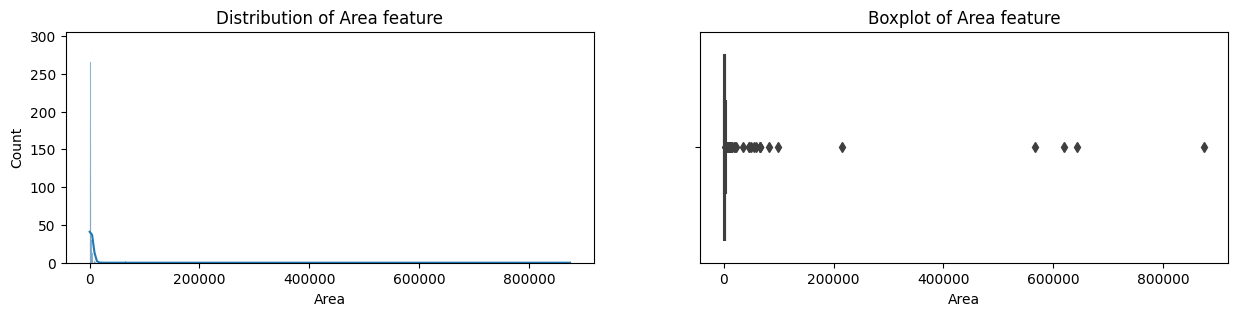

In [14]:
fig,ax = plt.subplots(1,2,figsize=(15,3))

sns.histplot(x=df['Area'],kde=True,ax = ax[0])
ax[0].set_title("Distribution of Area feature")

sns.boxplot(x = df['Area'],ax = ax[1])
ax[1].set_title("Boxplot of Area feature")
plt.show()

In [15]:
# Remvoing outiers
df = df[df['Area'] < 100000]

df = df.drop(index=[79, 1288, 1291, 1292, 1293, 1414, 2303, 2397, 2797, 3037, 3044,
       3051, 3216, 3413, 3464, 3526])

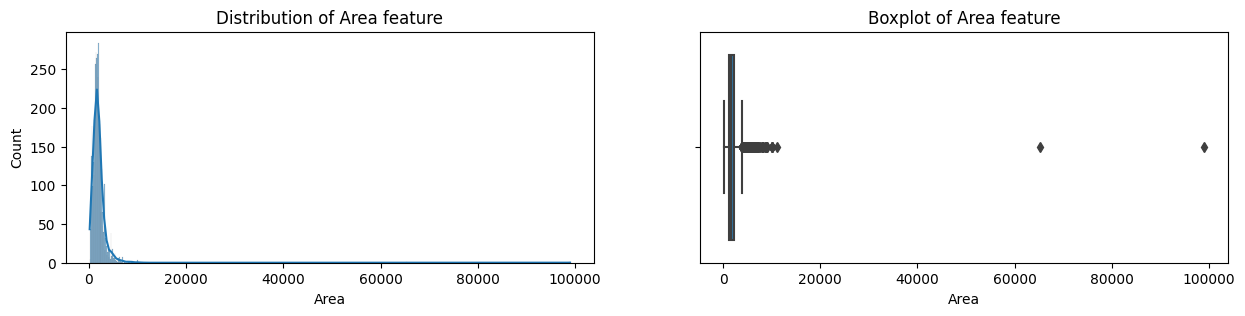

In [21]:
fig,ax = plt.subplots(1,2,figsize=(15,3))

sns.histplot(x=df['Area'],kde=True,ax = ax[0])
ax[0].set_title("Distribution of Area feature")

sns.boxplot(x = df['Area'],ax = ax[1])
ax[1].set_title("Boxplot of Area feature")
plt.show()

### Outliers detection and removal: `Super built up area, Built up area and Carpet Area` 

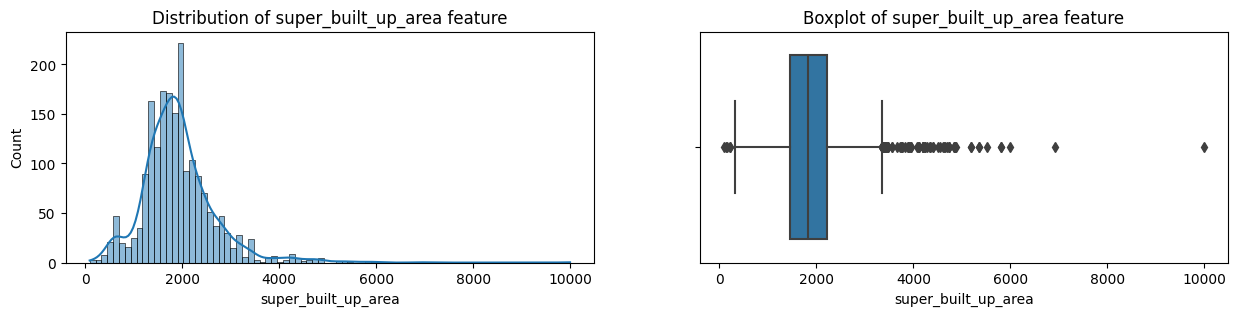

In [17]:
fig,ax = plt.subplots(1,2,figsize=(15,3))

sns.histplot(x=df['super_built_up_area'],kde=True,ax = ax[0])
ax[0].set_title("Distribution of super_built_up_area feature")

sns.boxplot(x = df['super_built_up_area'],ax = ax[1])
ax[1].set_title("Boxplot of super_built_up_area feature")
plt.show()

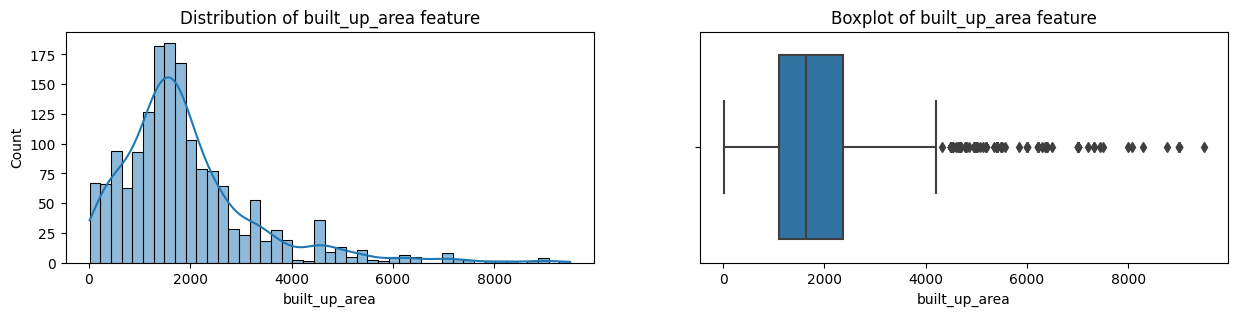

In [18]:
fig,ax = plt.subplots(1,2,figsize=(15,3))

sns.histplot(x=df['built_up_area'],kde=True,ax = ax[0])
ax[0].set_title("Distribution of built_up_area feature")

sns.boxplot(x = df['built_up_area'],ax = ax[1])
ax[1].set_title("Boxplot of built_up_area feature")
plt.show()

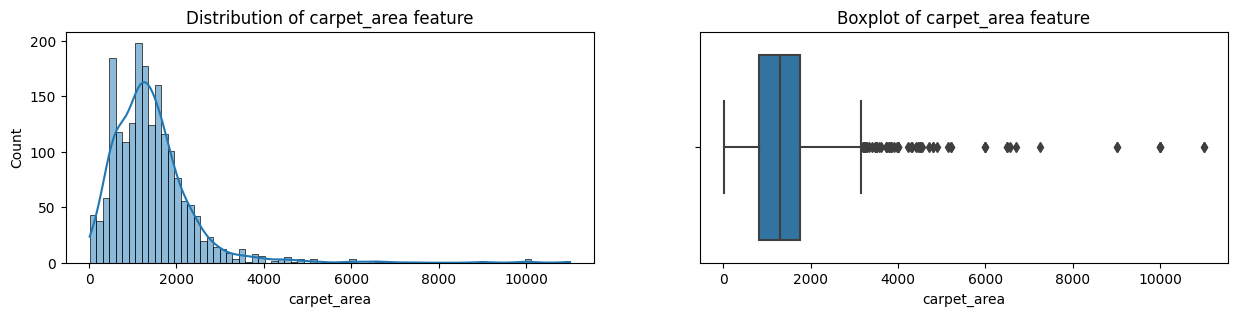

In [19]:
fig,ax = plt.subplots(1,2,figsize=(15,3))

sns.histplot(x=df['carpet_area'],kde=True,ax = ax[0])
ax[0].set_title("Distribution of carpet_area feature")

sns.boxplot(x = df['carpet_area'],ax = ax[1])
ax[1].set_title("Boxplot of carpet_area feature")
plt.show()

In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3710 entries, 0 to 3795
Data columns (total 25 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   property_name        3710 non-null   object 
 1   Property_Type        3710 non-null   object 
 2   society              3709 non-null   object 
 3   sector               3710 non-null   object 
 4   price                3710 non-null   float64
 5   Price_Per_SQFT       3710 non-null   float64
 6   bedRoom              3710 non-null   float64
 7   bathroom             3710 non-null   float64
 8   balcony              3710 non-null   object 
 9   address              3701 non-null   object 
 10  floorNum             3710 non-null   int64  
 11  facing               2620 non-null   object 
 12  agePossession        3710 non-null   object 
 13  description          3710 non-null   object 
 14  rating               3371 non-null   object 
 15  super_built_up_area  1914 non-null   float6